In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
import re

In [2]:
#loading data
columns = [ 'Title' , 'Genre' , 'Description']
column = ['Title' , 'Description']
train_set= pd.read_csv('train_data.txt',delimiter=':::',engine='python', names=columns,index_col=0 )
test_set=pd.read_csv('test_data_solution.txt', delimiter=':::', engine='python',names=columns, index_col=0 )

In [3]:
#data preprocessing
train_set.loc[:,'Description'] = train_set['Description'].astype(str).str.lower()
test_set.loc[:,'Description'] = test_set['Description'].astype(str).str.lower()
train_set.drop(columns=['Title'], inplace=True)
test_set.drop(columns=['Title'], inplace=True)
train_set.head()

,Genre,Description
1,drama,listening in to a conversation between his do...
2,thriller,a brother and sister with a past incestuous r...
3,adult,as the bus empties the students for their fie...
4,drama,to help their unemployed father make ends mee...
5,drama,the film's title refers not only to the un-re...


In [4]:
test_set.head()


,Genre,Description
1,thriller,"l.r. brane loves his life - his car, his apar..."
2,comedy,"spain, march 1964: quico is a very naughty ch..."
3,documentary,one year in the life of albin and his family ...
4,drama,"his father has died, he hasn't spoken with hi..."
5,drama,before he was known internationally as a mart...


In [5]:
train_set.info()


<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        54214 non-null  object
 1   Description  54214 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [6]:
train_set.describe()


,Genre,Description
count,54214,54214
unique,27,54085
top,drama,grammy - music award of the american academy ...
freq,13613,12


In [7]:
print(train_set.duplicated().sum())
print(test_set.duplicated().sum())

110
114


In [8]:
train_set=train_set.drop_duplicates()
test_set=test_set.drop_duplicates()
print(train_set.shape)
print(test_set.shape)

(54104, 2)
(54086, 2)


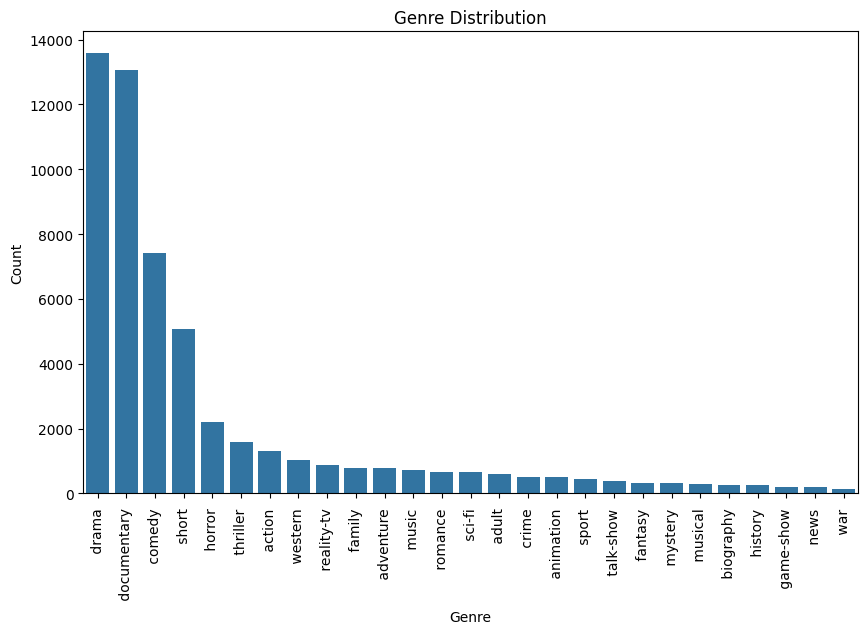

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='Genre' , data=train_set , order=train_set['Genre'].value_counts().index )
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [10]:
x_train=train_set['Description']
y_train=train_set['Genre']
x_test=test_set['Description']
y_test=test_set['Genre']
print(x_train.shape)
print(y_train.shape)

(54104,)
(54104,)


In [11]:
print(x_test.shape)
print(y_test.shape)

(54086,)
(54086,)


In [12]:
#feature engineering
def cleaning_data(text):
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    text = re.sub(r"\s+", " ", text).strip()
    return text
x_train=x_train.apply(cleaning_data)
x_test=x_test.apply(cleaning_data)
tfidf=TfidfVectorizer( stop_words ='english',max_features=5000)
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)

In [13]:
#splitting dataset
X_train,X_val,Y_train,Y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)
nb=MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

In [14]:
#model evaluation
y_pred=nb.predict(X_val)
accuracy_train=accuracy_score(Y_val, y_pred)
print("Train accuracy:", accuracy_train)
print("Train classification report:")
print(classification_report(Y_val, y_pred,zero_division=0))

Train accuracy: 0.5250901025783199
Train classification report:
               precision    recall  f1-score   support

      action        0.53      0.06      0.11       271
       adult        0.44      0.03      0.06       118
   adventure        0.64      0.06      0.12       141
   animation        0.00      0.00      0.00        84
   biography        0.00      0.00      0.00        54
      comedy        0.51      0.43      0.47      1445
       crime        0.00      0.00      0.00        88
 documentary        0.58      0.88      0.70      2685
       drama        0.46      0.83      0.59      2720
      family        0.00      0.00      0.00       145
     fantasy        0.00      0.00      0.00        57
   game-show        1.00      0.20      0.33        40
     history        0.00      0.00      0.00        52
      horror        0.70      0.34      0.46       429
       music        0.94      0.11      0.19       148
     musical        0.00      0.00      0.00        55


In [15]:
y_pred_test=nb.predict(x_test)
accuracy_test=accuracy_score(y_test, y_pred_test)
print("\nTest accuracy:", accuracy_test)
print("Test classification report:")
print(classification_report(y_test, y_pred_test,zero_division=0))


Test accuracy: 0.5181747587175979
Test classification report:
               precision    recall  f1-score   support

      action        0.56      0.08      0.14      1314
       adult        0.53      0.06      0.10       590
   adventure        0.81      0.06      0.10       773
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.51      0.42      0.46      7437
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.87      0.69     13085
       drama        0.45      0.83      0.59     13565
      family        0.50      0.00      0.00       774
     fantasy        0.00      0.00      0.00       322
   game-show        0.98      0.28      0.44       193
     history        0.00      0.00      0.00       243
      horror        0.70      0.33      0.45      2204
       music        0.77      0.09      0.16       720
     musical        0.00      0.00      0.00       273
 